In [2]:

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["axes3d.mouserotationstyle"] = 'azel'
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PolyCollection

from scipy.spatial import ConvexHull, HalfspaceIntersection
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.optimize import linprog, linear_sum_assignment
from scipy.linalg import null_space

from itertools import product, combinations
import time

from typing import Optional, Literal
import numpy as np
import pandas as pd
from datetime import timedelta
from ortools.math_opt.python import mathopt, model_parameters

import os


In [6]:

Naxis=9
xy = np.array(np.meshgrid(np.linspace(-1,1,Naxis),np.linspace(-1,1,Naxis))).reshape(2,-1).T
xy = xy + (0.5/(Naxis-1))*np.random.rand(xy.shape[0],xy.shape[1])
# z = xy[:,0]**2 + xy[:,1]**2
z = xy[:,0]*np.sin(np.pi*xy[:,1]/2 + 0.5*np.pi)
# z = xy[:,0]**2 - xy[:,1]**2
data = np.c_[xy,z]


Text(0.5, 0, 'Z')

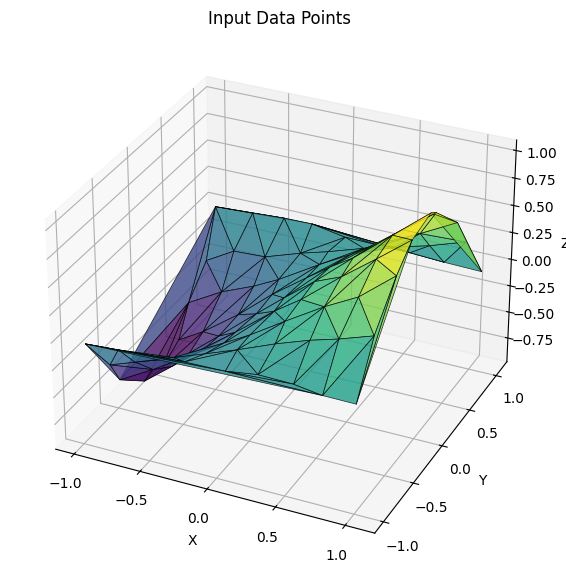

In [ ]:
# 4. Plotting
fig = plt.figure(figsize=(7, 7))


ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(xy[:, 0], xy[:, 1], z, cmap = 'viridis',
                 alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Input Data Points')
ax1.view_init(azim=-65)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [39]:

# CY data
path = "./data/CY.xlsx"
data = pd.read_excel(path ,index_col=0)
data = (data.values)[:,-3:]
data = data[~np.isnan(data).any(axis=1),:]


Text(0.5, 0, 'Z')

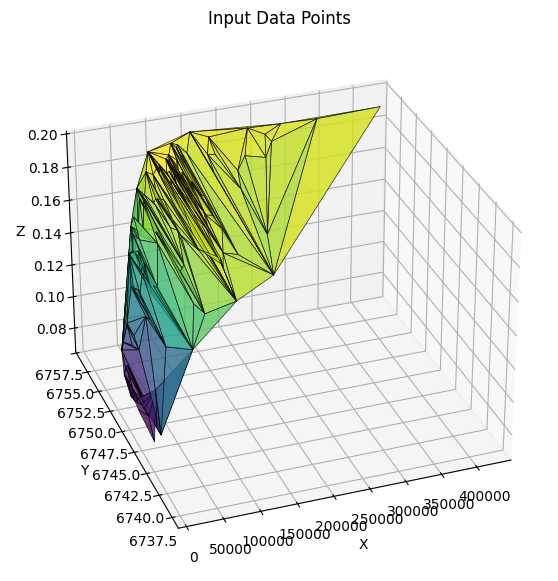

In [49]:
# 4. Plotting
fig = plt.figure(figsize=(7, 7))

# Subplot A: McCormick Relaxation (Envelope)
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(data[:, 0], data[:, 1], data[:, -1], cmap = 'viridis',
                 alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Input Data Points')
ax1.view_init(azim=-110)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [50]:

# 3D data
Naxis=4
x = np.array(np.meshgrid(*tuple([np.linspace(-1,1,Naxis)]*3))).reshape(3,-1).T
x = x + (0.5/(Naxis-1))*np.random.rand(x.shape[0],x.shape[1])
z = (x**2).sum(axis=1)
data = np.c_[x,z]



In [51]:
x

array([[-0.94839096, -0.92380581, -0.93411292],
       [-0.89283606, -0.84110182, -0.23136861],
       [-0.90731807, -0.86238003,  0.43727661],
       [-0.84790273, -0.98296216,  1.02440823],
       [-0.19195862, -0.87057556, -0.91654138],
       [-0.30189416, -0.98375877, -0.22311948],
       [-0.16892822, -0.93826468,  0.35447764],
       [-0.23767307, -0.85961656,  1.10574475],
       [ 0.49405777, -0.96684067, -0.89672681],
       [ 0.40569778, -0.91621591, -0.2535303 ],
       [ 0.4308714 , -0.99108873,  0.49322678],
       [ 0.44647423, -0.88101536,  1.10753799],
       [ 1.06847007, -0.93639319, -0.94620782],
       [ 1.13677483, -0.96490979, -0.20486818],
       [ 1.06384797, -0.9418814 ,  0.36815942],
       [ 1.01225679, -0.91648529,  1.0950978 ],
       [-0.8920395 , -0.30035393, -0.96052687],
       [-0.85972464, -0.28197139, -0.18098211],
       [-0.90218653, -0.28135586,  0.39477821],
       [-0.90645881, -0.30571713,  1.15120317],
       [-0.27520016, -0.16770701, -0.934